In [ ]:
#! pip install keras
#! pip install tensorflow
#!pip install -i https://pypi.anaconda.org/hahaaenois/simple emnist

In [155]:
import keras
import tensorflow
from tensorflow.keras import layers

from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop, SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


from emnist import list_datasets
from emnist import extract_training_samples
from emnist import extract_test_samples

import numpy as np
import matplotlib.pyplot as plt

In [156]:

np.random.seed(1671)  # for reproducibility

# network and training
NB_EPOCH = 100
BATCH_SIZE = 256
VERBOSE = 2
NB_CLASSES = 26   # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explainedin this chapter
N_HIDDEN = 512
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.20

print(list_datasets())
X_train, y_train = extract_training_samples('letters')
print("train shape: ", X_train.shape)
print("train labels: ",y_train.shape)
X_test, y_test = extract_test_samples('letters')
print("test shape: ",X_test.shape)
print("test labels: ",y_test.shape)

#for indexing from 0
y_train = y_train-1
y_test = y_test-1

#X_train is 124800 rows of 28x28 values --> reshaped in 124800 x 784
#X_train is 20800 rows of 28x28 values --> reshaped in 20800 x 784
RESHAPED = X_train.shape[1]*X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], RESHAPED)
X_test = X_test.reshape(X_test.shape[0], RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, NB_CLASSES)
Y_test = to_categorical(y_test, NB_CLASSES)

#Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
#Y_test = np_utils.to_categorical(y_test, NB_CLASSES)


# M_HIDDEN hidden layers
# 26 outputs
# final stage is softmax

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()



model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])



['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']
train shape:  (124800, 28, 28)
train labels:  (124800,)
test shape:  (20800, 28, 28)
test labels:  (20800,)
124800 train samples
20800 test samples
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 512)               401920    
                                                                 
 activation_48 (Activation)  (None, 512)               0         
                                                                 
 dropout_42 (Dropout)        (None, 512)               0         
                                                                 
 dense_55 (Dense)            (None, 256)               131328    
                                                                 
 activation_49 (Activation)  (None, 256)               0         
                                      

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


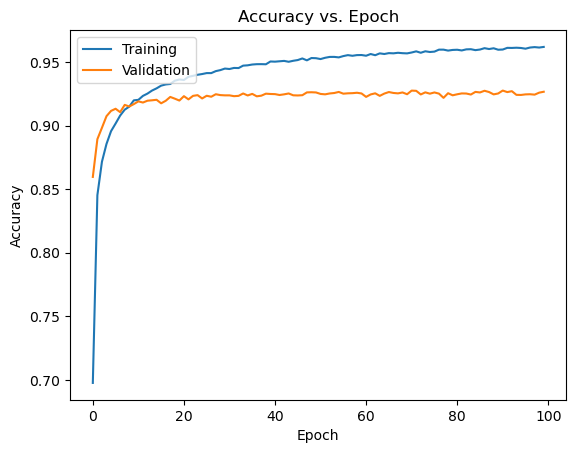

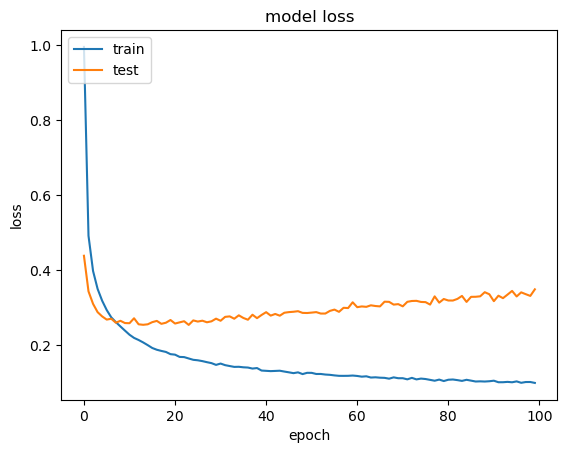

650/650 - 1s - loss: 0.3596 - accuracy: 0.9227 - 702ms/epoch - 1ms/step

Test score: 0.359578937292099
Test accuracy: 0.9226922988891602


In [157]:

# list all data in history
print(history.history.keys())


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Evaluación del modelo
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [158]:
model.save('modelos/modelo_C_01.keras')

1/1 [==============================] - 0s 13ms/step


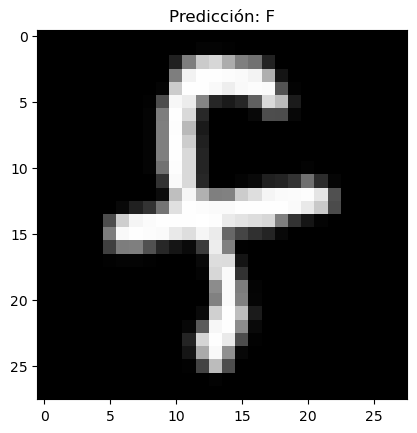

In [160]:

# Seleccionar una muestra aleatoria del conjunto de prueba
index = np.random.randint(0, len(X_test))
sample = X_test[index].reshape(1, -1)  # Reshape para que sea una fila

# Realizar la predicción usando el modelo cargado
prediction = model.predict(sample)

# Decodificar la predicción para obtener la clase predicha
predicted_class = np.argmax(prediction)

# Mostrar la letra y la predicción al usuario
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f'Predicción: {chr(predicted_class + 65)}')  # Convertir a letra (A-Z)
plt.show()

1/1 [==============================] - 0s 42ms/step
4


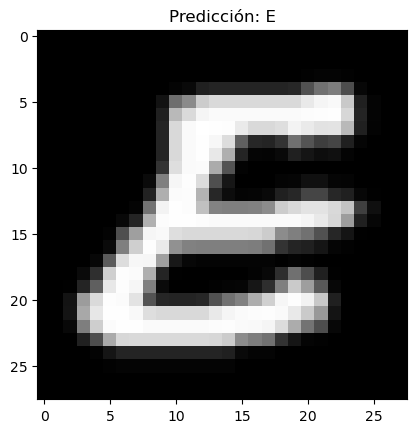

In [171]:
loaded_model = tensorflow.keras.models.load_model('modelos/modelo_C_01.keras')
# Seleccionar una muestra aleatoria del conjunto de prueba
index = np.random.randint(0, len(X_test))
sample = X_test[index].reshape(1, -1)  # Reshape para que sea una fila

# Realizar la predicción usando el modelo cargado
prediction = loaded_model.predict(sample)

# Decodificar la predicción para obtener la clase predicha
predicted_class = np.argmax(prediction)

print(predicted_class)

# Mostrar la letra y la predicción al usuario
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f'Predicción: {chr(predicted_class + 65)}')  # Convertir a letra (A-Z)
plt.show()